# Utils

In [66]:
# Utils
from math import atan2

def orientation(a, b, c):
    ob = (b[0]-a[0], b[1]-a[1])
    oc = (c[0]-a[0], c[1]-a[1])
    det = ob[0]*oc[1]-ob[1]*oc[0]
    return -1 if det<0 else 1 if det>0 else 0

# Checks if the point b its on the segment ac
def onSegment(a,b,c):
    on_x_proyection = b[0]<=max(a[0],c[0]) and b[0]>= min(a[0],c[0])
    # print(f"pr_x: {on_x_proyection}")
    on_y_proyection = b[1]<=max(a[1],c[1]) and b[1]>= min(a[1],c[1])
    # print(f"pr_y: {on_y_proyection}")
    if(on_x_proyection and on_y_proyection): return True
    return False

def doIntersect(a,b,c,d):
    # Orientations between segment and the other points
    o_c_segment_ab = orientation(a,b,c)
    o_d_segment_ab = orientation(a,b,d)
    o_a_segment_cd = orientation(c,d,a)
    o_b_segment_cd = orientation(c,d,b)

    # Case 1
    if(o_c_segment_ab != o_d_segment_ab and o_a_segment_cd != o_b_segment_cd):
        return True
    
    # Special cases when they are colinear
    # print("Case 1")
    if(o_c_segment_ab == 0 and onSegment(a,c,b)): return True
    # print("Case 2")
    if(o_d_segment_ab == 0 and onSegment(a,d,b)): return True
    # print("Case 3")
    if(o_a_segment_cd == 0 and onSegment(c,a,d)): return True
    # print("Case 4")
    if(o_b_segment_cd == 0 and onSegment(c,b,d)): return True

    return False

def get_convex_hull(p):
    n = len(p)
    if n<3: return
    hull = []
    s_y = min(p, key=lambda x: x[1])
    p.sort(key=lambda x: (atan2(x[1]-s_y[1], x[0]-s_y[0]), -x[1], x[0]))
    for point in p:
        while len(hull)>=2 and orientation(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)
    return hull

# Lecture 2

Implementación de triangulación de polígonos utilizando componentes monotónicos.

In [230]:
import numpy as np

def generate_clockwise_polygon(n_points):
    # Generate random points
    points = np.random.rand(n_points, 2)
    
    # Calculate the centroid of the points
    centroid = points.mean(axis=0)
    
    # Calculate the angles from the centroid to the points
    angles = np.arctan2(points[:,1] - centroid[1], points[:,0] - centroid[0])
    
    # Sort the points by the angles in clockwise order
    sorted_points = points[angles.argsort()[::-1]]
    
    return sorted_points.tolist()


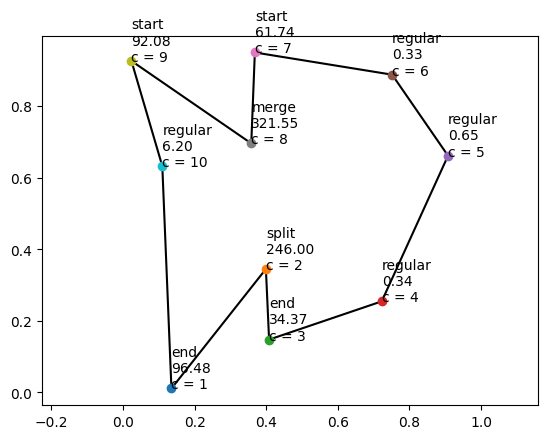

In [246]:
import numpy as np

# type of vertex: start, end, split, merge, regular
def type(p1,p2,p3):
    v1 = np.array(p2)-np.array(p1)
    v2 = np.array(p3)-np.array(p1)
    angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    # angle = angle*180/np.pi
    orientation = np.cross(v1,v2)
    # print(f"p1: {p1} p2: {p2} p3: {p3}")
    # print(f"v1: {v1} v2: {v2}")
    # print(f"orientation: {orientation} angle: {angle}")
    if orientation > 0:
        angle = 2*np.pi-angle

    if (p1[1] <= p2[1] and p3[1] <= p2[1]) and angle <= np.pi:
        return 'start', angle*180/np.pi
    elif (p1[1] <= p2[1] and p3[1] <= p2[1]) and angle >= np.pi:
        return 'split', angle*180/np.pi
    elif (p1[1] >= p2[1] and p3[1] >= p2[1]) and angle <= np.pi:
        return 'end', angle*180/np.pi
    elif (p1[1] >= p2[1] and p3[1] >= p2[1]) and angle >= np.pi:
        return 'merge', angle*180/np.pi
    else:
        return 'regular', angle

# test
import matplotlib.pyplot as plt
vs = generate_clockwise_polygon(10)
for i in range(len(vs)-1):
    plt.plot([vs[i][0],vs[i+1][0]],[vs[i][1],vs[i+1][1]],'k')
plt.plot([vs[-1][0],vs[0][0]],[vs[-1][1],vs[0][1]],'k')

c=1
for i in range(len(vs)-1,-1,-1):
    plt.plot(vs[i][0],vs[i][1],'o')
    t = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])[0]
    a = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])[1]
    plt.text(vs[i][0],vs[i][1],f"{t}\n{a:.2f}\nc = {c}")
    c+=1
    

plt.axis('equal')
plt.show()

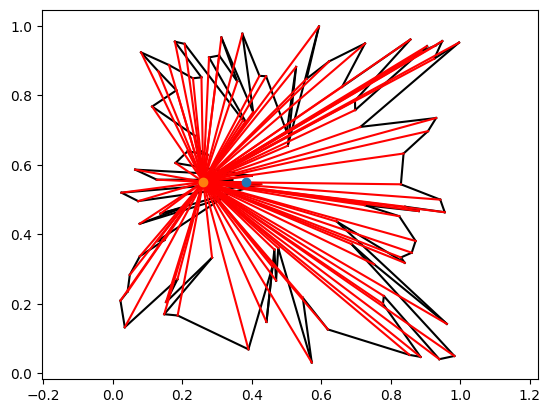

In [229]:
# test
import matplotlib.pyplot as plt
import random

# Triangulation of a y-monotone polygon
def triangulation_y_monotone(vs, segments):
    if len(vs) < 3:
        return segments
    segments.append((vs[-1], vs[1]))
    vs.remove(vs[0])
    segments = triangulation_y_monotone(vs, segments)
    return segments

# Generate random points
vs = []
n = 100
for _ in range(n):
    x = random.randint(0, n)
    y = random.randint(0, n)
    vs.append([x, y])

for _ in range(n):
    x = random.randint(n, n+n)
    y = random.randint(n, n+n)
    vs.append([x, y])

# for i in vs:
#     plt.plot(i[0],i[1],'o')

# Sort the vertices by y-coordinate
# vs_convex = get_convex_hull(vs)
vs_convex = generate_clockwise_polygon(n)

for i in range(len(vs_convex)-1):
    plt.plot([vs_convex[i][0],vs_convex[i+1][0]],[vs_convex[i][1],vs_convex[i+1][1]],'k')
plt.plot([vs_convex[-1][0],vs_convex[0][0]],[vs_convex[-1][1],vs_convex[0][1]],'k')

triangles = triangulation_y_monotone(vs_convex, [])
for t in triangles:
    plt.plot([t[0][0],t[1][0]],[t[0][1],t[1][1]],'r')

for v in vs_convex:
    plt.plot(v[0],v[1],'o')

plt.axis('equal')
plt.show()
